In [1]:
from tensorflow.keras import datasets
# from keras.utils import np_utils

from tensorflow.keras.utils import to_categorical


In [2]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(y_train[:5])

#one hot encoding
# y_train = np_utils.to_categorical(y_train)
y_train = to_categorical(y_train)

print(y_train[:5])
# y_test = np_utils.to_categorical(y_test)
y_test = to_categorical(y_test)
L, W, H = X_train.shape

# -1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
X_train = X_train / 255.0
X_test = X_test / 255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):
    #모델 초기화
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,)))
    model.add(Dense(layers[1], activation='relu'))  
    model.add(Dense(layers[2], activation='relu'))      

    #드롭아웃 계층 Dropout(p) p라는 확률로
    #   출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))

    #출력층
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
    return model    

In [4]:
input_number = 784 # 28 * 28
# 은닉계층 3개, 은닉노드수 128개, 64개, 32개
hidden_layers = [128, 64, 32]
print(hidden_layers)
number_of_class = 10
output_number = number_of_class
# 모델 생성 
model = make_model(input_number, hidden_layers, output_number)

[128, 64, 32]


In [5]:
# 모델 학습
hist =model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 2s 3ms/step - loss: 0.5071 - accuracy: 0.8480 - val_loss: 0.1751 - val_accuracy: 0.9481
Epoch 2/5
375/375 [==============================] - 1s 2ms/step - loss: 0.2034 - accuracy: 0.9413 - val_loss: 0.1314 - val_accuracy: 0.9599
Epoch 3/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1438 - accuracy: 0.9588 - val_loss: 0.1075 - val_accuracy: 0.9675
Epoch 4/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.0988 - val_accuracy: 0.9713
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9732 - val_loss: 0.0907 - val_accuracy: 0.9740


In [6]:
# 모델 평가
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9729


[0.08806191384792328, 0.9728999733924866]

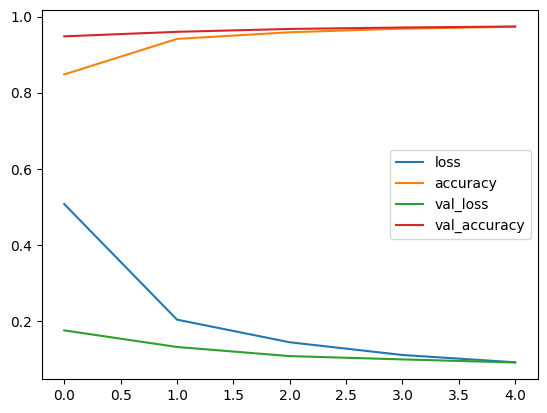

In [7]:
# 모델 학습과정 표시
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()